<h1> title: "Proyecto Integrador" </h1>
<strong>  author: "Julián Castelblanco Benítez"</strong>

Cargamos las librerías

In [1]:
import re
import matplotlib.pyplot as plt
import nltk #libreria de procesamiento natural del lenguaje 
import glob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer # autor diferente para Stemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


Lectura de la base de datos

In [2]:
list_of_files = glob.glob('/home/jcastelblb/Proyecto_Integrador/datasets/papers-txt/*.txt')           # create the list of file
texto=""
for file_name in list_of_files:
  #print(file_name)
  input_file = open(file_name,"r",encoding='iso-8859-1')
  texto = texto + input_file.read()
#print(len(list_of_files))
#print(text)

Selección de los datos que queremos (Únicamente letras)

In [3]:
texto= re.sub('[^A-z]+',' ',texto) #lo mismo de stringr
print(len(texto))

57979780


Tokenizar: crea un vector de todas las palabras de los textos.

In [4]:
tokens= texto.split() 
tokens=[w.lower() for w in tokens if (len(w)>1) and w.isalpha()] # pasar a minúscula seleccionar palabras>1 y que sean letras 
print(len(tokens))
print(tokens[:20])

8910161
['entropy', 'nand', 'early', 'functional', 'completeness', 'in', 'entropy', 'networks', 'forrest', 'fabian', 'jesse', 'school', 'of', 'computer', 'and', 'information', 'technology', 'beijing', 'jiao', 'tong']


Cargamos Stop Words y removemos las palabras que no agregan significado, artículos,etc.

In [5]:
sw=stopwords.words('english')
tokens=[w for w in tokens if w not in sw]
print(len(tokens))
print(tokens[:20])

5316522
['entropy', 'nand', 'early', 'functional', 'completeness', 'entropy', 'networks', 'forrest', 'fabian', 'jesse', 'school', 'computer', 'information', 'technology', 'beijing', 'jiao', 'tong', 'university', 'beijing', 'china']


Buscamos palabras que Existan en el diccionario

In [7]:
tokens= [w for w in tokens if wordnet.synsets(w)]
print(tokens[:20])

['entropy', 'early', 'functional', 'completeness', 'entropy', 'networks', 'fabian', 'school', 'computer', 'information', 'technology', 'beijing', 'jiao', 'university', 'beijing', 'china', 'institutes', 'shanghai', 'jiao', 'university']


Creamos el Stemmer (palabras que comparten una misma raíz)

In [8]:
stemmer= PorterStemmer() 
#stemmer2= LancasterStemmer() ## en qué consiste el lancasterS
tokens=[stemmer.stem(w) for w in tokens] ## Stemen 
print(len(tokens))
print(tokens[:20])

4551084
['entropi', 'earli', 'function', 'complet', 'entropi', 'network', 'fabian', 'school', 'comput', 'inform', 'technolog', 'beij', 'jiao', 'univers', 'beij', 'china', 'institut', 'shanghai', 'jiao', 'univers']


Lematizar (cambia palabras que signifiquen lo mismo en tiempo presente) ej. are is were was por be

In [9]:
wordnet_lemmatizer= WordNetLemmatizer()
tokens= [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens] #lematiza los verbos 
tokens= [wordnet_lemmatizer.lemmatize(w, pos="a") for w in tokens] #lematiza los adjetivos 
tokens= [wordnet_lemmatizer.lemmatize(w, pos="n") for w in tokens] #lematiza los sustantivos 
print(len(tokens))
print(tokens[:20])

4551084
['entropi', 'earli', 'function', 'complet', 'entropi', 'network', 'fabian', 'school', 'comput', 'inform', 'technolog', 'beij', 'jiao', 'univers', 'beij', 'china', 'institut', 'shanghai', 'jiao', 'univers']


Frecuencia de las palabras y mostrar las 20 primeras

In [10]:
fdist1=nltk.FreqDist(tokens)
print("tokens= ", len(tokens))
print("len voc= ",len(fdist1))
fdist2=fdist1.most_common(20)
print(fdist2)


tokens=  4551084
len voc=  14005
[('use', 39438), ('set', 34352), ('algorithm', 28751), ('let', 25708), ('follow', 25645), ('time', 24957), ('one', 24883), ('comput', 24716), ('number', 21214), ('function', 20767), ('give', 20706), ('case', 20526), ('two', 20331), ('show', 19631), ('problem', 19152), ('model', 19076), ('result', 19017), ('theorem', 18977), ('graph', 18816), ('gener', 17908)]


grafico de barras para las 20 primeas

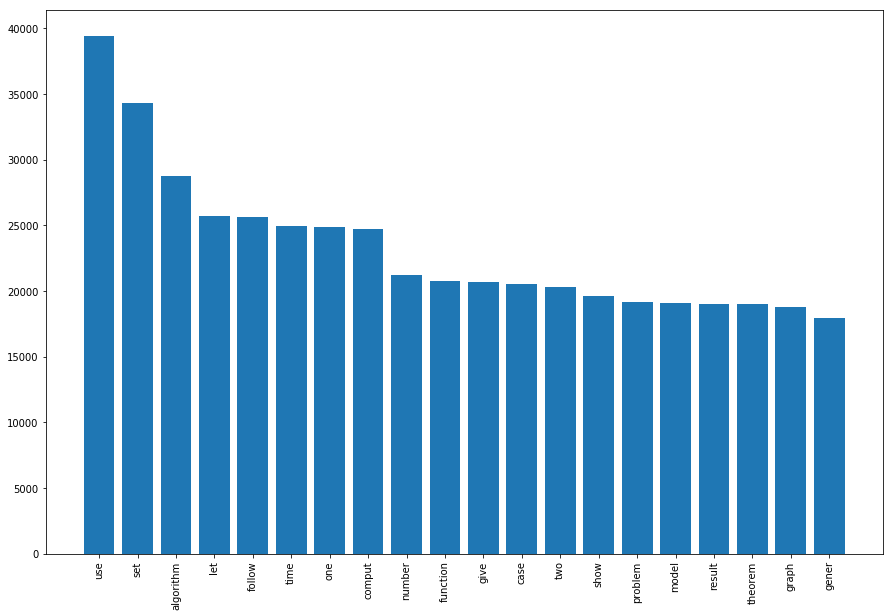

In [11]:
x,y=zip(*fdist2)# crea el vector xy en donde busca cada uno y pone las recurrencias de cada una
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90) # rotar los rótulos del eje x
plt.show()